# Tweets Polarity Analysis

In this assignment, sentiment analysis of the Twitter activity of various news oulets has been performed, and the findings are presented in graphs. The news outlet selected for tweets analysis are __BBC, CBS, CNN, Fox, and New York times__

In [2]:
#import dependencies
import pandas as pd
import numpy as np
import tweepy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


In [3]:
# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [4]:
target_users = ("@nytimes","@BBCWorld","@CNN", "@CBSNews","@FoxNews")
sentiment_compound=[]
for user in target_users:
    counter=0
    oldest_tweet=None
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    for x in range(5):
        public_tweets = api.user_timeline(user, max_id=oldest_tweet)
        for tweet in public_tweets:
            results = analyzer.polarity_scores(tweet['text'])
            compound_list.append(results["compound"])
            positive_list.append(results["pos"])
            neutral_list.append(results["neu"])
            negative_list.append(results["neg"])
            time_stamp=counter+1
        oldest_tweet=tweet['id']-1 
        #print(f"{counter} {tweet['text']}")
    sentiment_dict={user: compound_list}
    sentiment_compound.append(sentiment_dict)
#     comp_series=pd.Series(sentiment_dict)
#     print(comp_series)
    #df_comp.append(comp_series,ignore_index=False)
    
            

In [5]:
print(sentiment_compound)

[{'@nytimes': [0.8074, -0.4019, -0.6705, -0.128, 0.8225, 0.2023, 0.0, -0.296, 0.5859, 0.1901, 0.6486, -0.2411, 0.0, 0.0, 0.0, 0.0, 0.0, -0.6249, 0.4019, -0.2732, -0.7351, 0.8126, 0.0, 0.0, 0.0, 0.0, 0.0, 0.128, 0.0, 0.0, -0.0772, 0.4767, 0.0, 0.2732, -0.5994, 0.743, 0.3612, 0.3612, -0.7269, 0.2023, 0.6369, 0.7269, -0.875, -0.6705, -0.0258, 0.5106, 0.0, 0.6369, -0.296, 0.0, 0.4574, 0.7906, 0.0, 0.5859, -0.296, -0.296, 0.0, -0.3182, -0.8074, 0.0, 0.3612, 0.4404, 0.0, 0.6369, 0.25, 0.5267, -0.1531, 0.6124, 0.5994, -0.4215, 0.0, 0.5106, -0.7579, -0.6249, 0.8097, 0.0, -0.25, 0.7184, 0.0, 0.357, 0.5859, 0.2732, 0.0, -0.2023, -0.34, -0.0387, -0.5574, 0.1027, 0.2263, 0.0, -0.1027, 0.5719, 0.3182, 0.7906, 0.0, 0.0, 0.296, 0.0, 0.0, 0.0772]}, {'@BBCWorld': [0.0, 0.3309, -0.5106, 0.5423, -0.6486, 0.0258, 0.3612, -0.8225, 0.0, 0.5719, 0.5423, 0.5859, 0.0, -0.802, 0.0, -0.4215, 0.0, -0.7184, 0.5859, 0.0, 0.1027, 0.0, 0.0, 0.3612, 0.0, 0.0, 0.0, 0.3612, 0.3182, 0.0, -0.1027, -0.6369, 0.0, 0.0, 0.0, 

In [6]:
# initializing empty dataframe of 100 rows
indx=range(100)
df_comp=pd.DataFrame(index=indx)
# join in a single df
for x in range(len(target_users)):
    df_x=pd.DataFrame(sentiment_compound[x])
    df_comp=df_comp.join(df_x)
df_comp['tweets ago']=range(1,101)
df_comp.head()


,@nytimes,@BBCWorld,@CNN,@CBSNews,@FoxNews,tweets ago
0,0.8074,0.0000,0.6124,0.0000,-0.2960,1
1,-0.4019,0.3309,-0.5994,-0.7351,0.3612,2
2,-0.6705,-0.5106,-0.2960,-0.0772,-0.5413,3
3,-0.1280,0.5423,0.8176,-0.5859,0.2263,4
4,0.8225,-0.6486,0.7650,-0.1779,0.5719,5


True


Text(0.5,1,'Sentiment Analysis of Tweets (2018-06-09 19:02) for Various News Channels')

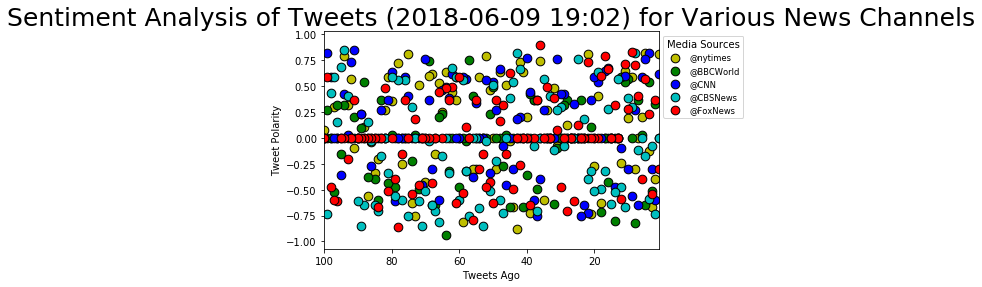

In [7]:
x_val=df_comp['tweets ago']
size=75
ax1 = df_comp.plot(kind='scatter', x='tweets ago', y='@nytimes', label='@nytimes', color='y', s=size,linewidths=1,edgecolor='black')    
ax2 = df_comp.plot(kind='scatter', x='tweets ago', y='@BBCWorld', label='@BBCWorld', color='g', s=size,linewidths=1,edgecolor='black',ax=ax1)    
ax3 = df_comp.plot(kind='scatter', x='tweets ago', y='@CNN', label='@CNN', color='b', s=size,linewidths=1,edgecolor='black',ax=ax1)
ax4 = df_comp.plot(kind='scatter', x='tweets ago', y='@CBSNews', label='@CBSNews', color='c', s=size,linewidths=1,edgecolor='black',ax=ax1)
ax5 = df_comp.plot(kind='scatter', x='tweets ago', y='@FoxNews', label='@FoxNews', color='r', s=size,linewidths=1,edgecolor='black',ax=ax1)
# ax6 = df_comp.plot(kind='scatter', x='tweets ago', y='@Reuters', color='w', ax=ax1)

print(ax1 == ax2 == ax3 == ax4 == ax5)  # True
ax1.set_xlim(x_val.max(),x_val.min())
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="upper left", bbox_to_anchor=(1,1), title="Media Sources", 
                  labelspacing=0.5)
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Sentiment Analysis of Tweets ({now}) for Various News Channels",fontsize=25)

# plt.legend()
# plt.fig_size(20,8)

In [8]:
df_comp_mean=df_comp.mean()
df_comp_mean=df_comp_mean.drop('tweets ago')

Text(0,0.5,'Tweet Polarity')

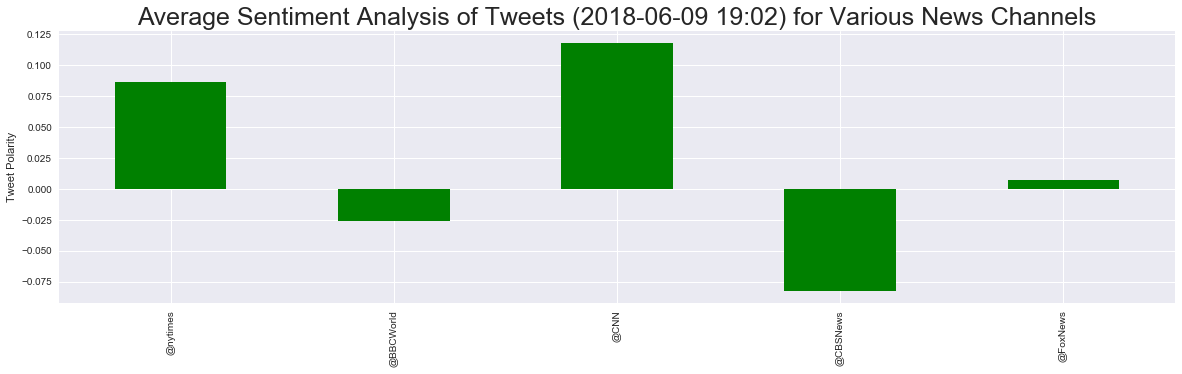

In [9]:
sns.set()
df_comp_mean.plot(kind='bar',color='g', figsize=(20,5))
plt.title(f"Average Sentiment Analysis of Tweets ({now}) for Various News Channels",fontsize=25)
plt.ylabel("Tweet Polarity")
